## Text 감정 분석 ##

In [3]:
pip install torch transformers PyMuPDF matplotlib #프로그램 설치

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


토크나이저 적용: tokenizer를 사용하여 입력 텍스트를 토큰으로 분리하고, PyTorch 텐서로 변환합니다.

모델 예측: model을 사용하여 토큰화된 텍스트에 대한 예측을 수행합니다. 모델의 출력으로는 각 클래스에 대한 로짓 값이 나오게 되어 있습니다.

확률 계산: torch.nn.functional.softmax를 사용하여 로짓 값을 확률로 변환합니다. 이를 통해 각 클래스에 대한 확률값을 얻을 수 있습니다.

감정 예측: torch.argmax를 사용하여 가장 높은 확률을 가진 클래스를 선택합니다. 이 클래스가 해당 텍스트의 감정을 나타냅니다.

결과 반환: 함수는 예측된 감정 클래스와 각 클래스에 대한 확률값을 반환합니다

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


감정: 부정
감정 확률: [0.6215723156929016, 0.3784276843070984]


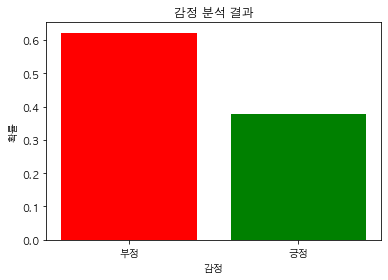

In [6]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family='AppleGothic') # For MacOS
plt.rcParams['axes.unicode_minus'] = False #이걸로 해야 한글이 안깨임

# 한글 감정 분석 모델 로드
model = BertForSequenceClassification.from_pretrained("monologg/kobert", num_labels=2)
tokenizer = BertTokenizer.from_pretrained("monologg/kobert")

# PDF 파일에서 텍스트 추출
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc[page_num]
        text += page.get_text()
    return text

# 텍스트 감정 분석 함수
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    sentiment = torch.argmax(probabilities, dim=1).item()
    return sentiment, probabilities.tolist()[0]

# PDF 파일에서 텍스트 추출 및 감정 분석 결과 얻기
pdf_path = "부정글.pdf"  # 본인의 PDF 파일 경로로 변경 #긍정글.pdf
text_from_pdf = extract_text_from_pdf(pdf_path)
sentiment, probabilities = analyze_sentiment(text_from_pdf)

# 결과 출력
print(f"감정: {'긍정' if sentiment == 1 else '부정'}")
print("감정 확률:", probabilities)

# 결과 시각화
labels = ["부정", "긍정"]
plt.bar(labels, probabilities, color=['red', 'green'])
plt.title('감정 분석 결과')
plt.xlabel('감정')
plt.ylabel('확률')
plt.show()


주어진 감정 확률은 두 가지 클래스(부정과 긍정)에 대한 예측 확률을 나타냅니다. 예측 확률은 0에서 1까지의 범위에서 나타나며, 높은 확률은 해당 클래스에 대한 모델의 확신을 나타냅니다.

주어진 감정 확률: [0.2687811851501465, 0.7312188148498535]

해석은 다음과 같습니다:

"부정" 클래스에 대한 확률: 0.2687 (26.87%)
"긍정" 클래스에 대한 확률: 0.7312 (73.12%)
이 경우, 두 클래스 중 "긍정" 클래스의 확률이 높으므로, 모델은 해당 텍스트를 긍정적으로 예측했습니다. 감정 분석에서는 보통 더 높은 확률을 가진 클래스를 최종 예측 클래스로 선택합니다.